# CSE275 HW2

## Problem 1: Deform a shape

In this problem, we will practice part of what we learned in the image-to-3D lecture for shape deformation.

### 1. Laplacian
Given a mesh $M=(V, E, F)$, we assume that the adjacency matrix is $A\in\mathbb{R}^{n\times n}$, $D\in\mathbb{R}^{n\times n}$ is a diagonal matrix where $D[i,i]$ is the degree of the $i$-th vertex. The Laplacian matrix is defined as $L=D-A$.

Prove that:

(a) $\sum_{(i,j)\in E}\|x_i-x_j\|^2=x^T L x$ for $x\in \mathbb{R}^n$. [1pt]

(b) $L\in\mathbb{S}^n_{+} $, i.e., $L$ is a symmetric and positive semi-definite matrix. [1pt]

(c) For the data matrix $P\in\mathbb{R}^{n\times 3}$ where each row corresponds to a point in $\mathbb{R}^3$, denote the columns of $P$ as $P=[x, y, z]$ and rows of $P$ as $P=[p_1^T; p_2^T; \ldots; p_n^T]$, show that 
$\sum_{(i,j)\in E}\|p_i-p_j\|^2=x^T L x+ y^T L y + z^T L z$. (hint: Use the conclusion from 1(a)) [1pt]

(a): 
$$
A[i,j] = \left\{ \begin{aligned} 
& 1, \quad (i,j) \in E \\
& 0, \quad otherwise \end{aligned}
\right.
$$

Denote $D[i,i] = d_i$, we have:

$$
L[i,j] = \left\{ \begin{aligned} 
& d_i, \quad i=j \\
& -1, \quad (i,j) \in E, i \neq j \\
& 0, \quad otherwise \end{aligned}
\right.
$$

Hence $L$ is symmetric. $(1)$

$$
x^T L x = \sum^{|V|}_{i=1} d_i (x_i)^2 + \sum_{(i,j) \in E} (-2x_i x_j) (2)
$$

Since $\sum^{|V|}_{i=1} d_i = 2 |E|$, each edge $(i,j) \in E$ can be grouped with 2 vertices $i$ and $j$. So we have:

$$
\begin{aligned} 
(2) &= \sum_{(i,j) \in E} (x_i^2-2x_i x_j+x_j^2) \\
    &= \sum_{(i,j) \in E} ||x_i-x_j||^2 \\
\end{aligned}
$$

So the equation is proved.

(b):

From (a) $=>$ For $\forall x \in R^n: x^T L x = \sum_{(i,j) \in E} ||x_i-x_j||^2 \geq 0$ 

$=>$ L is Positive Semi-Definite.

L is also symmetric, as shown in (a) at $(1)$.

(c):

From (a) we can get:

$$
\begin{aligned} 
x^T L x + y^T L y + z^T L z &= \sum_{(i,j) \in E} ||x_i-x_j||^2 + \sum_{(i,j) \in E} ||y_i-y_j||^2 + \sum_{(i,j) \in E} ||z_i-z_j||^2\\
                            &= \sum_{(i,j) \in E} (||x_i-x_j||^2 + ||y_i-y_j||^2 + ||z_i-z_j||^2) \\
                            &= \sum_{(i,j) \in E} || [x_i, y_i, z_i]^T - [x_j, y_j, z_j]^T ||^2 \\
                            &= \sum_{(i,j) \in E} || p_i - p_j ||^2 \\
\end{aligned}
$$

Hence the equation is proved.




### 2. Normalized Laplacian
Normalized Laplacian is defined as the normalized version of the Laplacian matrix above: $$L_{norm} = D^{-1} L$$

(a) Prove that the sum of each row of $L_{norm}$ is 0. [1pt]

$D^{-1} = diag(\frac{1}{d_1}, \frac{1}{d_2}, ..., \frac{1}{d_n})$. Denote $A = [\vec{a_1}, \vec{a_2}, ..., \vec{a_n}]$. $D^{-1}A = [\frac{1}{d_1}\vec{a_1}, \frac{1}{d_2}\vec{a_2}, ..., \frac{1}{d_n}\vec{a_n}]$

$$L_{norm} = D^{-1}(D-A) = I - D^{-1}A = [\vec{I_1} - \frac{1}{d_1}\vec{a_1}, \vec{I_2} - \frac{1}{d_2}\vec{a_2}, ..., \vec{I_n} - \frac{1}{d_n}\vec{a_n}] $$

Where $I$ denotes the $n*n$ identity matrix. $I_i$ denotes the ith row of $I$.

Denote $L_i = \vec{I_i} - \frac{1}{d_i} \vec{a_i}, i \in \{1, 2,..., n\}$. Since by definition $deg(p_i) = d_i$, we have:

$$\sum^{n}_{j=1}{L_{ij}} = 1 - \frac{1}{d_i} \sum_{k=1}^{d_i}{1} = 1-1 = 0$$

So the sum of each row of $L_{norm}$ is 0. Proved.



(b) The difference between a vertex $x$ and the average position of its 1-ring neighborhood is a quantity that provides interesting geometric insight of the shape. It can be shown that, 
$$x-\frac{1}{|N(x)|}\sum_{y_i\in N(x)} y_i \approx H \vec n \Delta A$$
for a good mesh, where $N(x)$ is the 1-ring neighorhood vertices of $x$ by the mesh topology, $H=\frac{1}{2}(\kappa_{min}+\kappa_{\max})$ is the mean curvature at $x$ (in the sense of the underlying continuous surface being approximated), $\vec n$ is the surface normal vector at $x$, and $\Delta A$ is a quantity proportional to the total area of the 1-ring fan (triangles formed by $x$ and vertices along the 1-ring).

Define $\Delta p_i := p_i-\frac{1}{|N(p_i)|}\sum_{p_j\in N(p_i)} p_j$. Prove that $\Delta p_i = [L_{norm} P]_i$, where $P$ and $p_i$ are defined as in 1(c), and $[X]_i$ is to access the $i$-th row of $X$. [1pt]

$$
\begin{aligned}
L_{norm} P &= (I-D^{-1}A)P \\
            &= P - D^{-1}AP \\
            &= [p_1, p_2,..., p_n] - [\frac{1}{d_1}\vec{a_1}P, \frac{1}{d_2}\vec{a_2}P, ..., \frac{1}{d_n}\vec{a_n}P] \\
            &= [p_1-\frac{1}{d_1}\vec{a_1}P, p_2-\frac{1}{d_2}\vec{a_2}P,..., p_n-\frac{1}{d_n}\vec{a_n}P] 
\end{aligned}
$$

For the ith row of the above column vector, and from the fact that $d_i = |N(p_i)|$ by definition of vertex degree, we have:

$$
\begin{aligned} 
[L_{norm}P]_i &= p_i-\frac{1}{d_i}\vec{a_i}P \\
            &= p_i-\frac{1}{| N(p_i) |}\vec{a_i} [p_1, p_2,..., p_n] \quad (1)
\end{aligned}
$$

Since 
$$(\vec{a_i})_j = \left\{ \\
\begin{aligned} 
& 1, \quad p_j \in N(p_i) \\
& 0, \quad otherwise \\
\end{aligned}
\right.
$$

We can further simplify $(1)$ to:

$$
\begin{aligned}
p_i-\frac{1}{| N(p_i) |}\vec{a_i} [p_1, p_2,..., p_n] 
&= p_i-\frac{1}{| N(p_i) |} \sum_{p_j \in N(p_i)}{p_j} \\
&= \Delta {p_i} \\
\end{aligned}
$$

Hence, $[L_{norm}P]_i = \Delta {p_i}$ proved.




### 3. Shape Deformation (extra credit)
Please load the source.obj and target.obj files using the trimesh library of Python, and optimize to deform the vertices of the source.obj to match target.obj. Plot the source object, target object, and deformed object. [5pt]

(a) Chamfer-only loss

In [2]:
!python -m pip install trimesh

Looking in indexes: http://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/688.9 kB ? eta -:--:--
     - ----------------------------------- 30.7/688.9 kB 660.6 kB/s eta 0:00:01
     --- --------------------------------- 61.4/688.9 kB 656.4 kB/s eta 0:00:01
     --- --------------------------------- 71.7/688.9 kB 653.6 kB/s eta 0:00:01
     ---- -------------------------------- 92.2/688.9 kB 655.4 kB/s eta 0:00:01
     ----- ------------------------------ 112.6/688.9 kB 504.4 kB/s eta 0:00:02
     ------- ---------------------------- 143.4/688.9 kB 568.9 kB/s eta 0:00:01
     --------- -------------------------- 174.1/688.9 kB 583.1 kB/s eta 0:00:01
     ---------- ------------------------- 204.8/688.9 kB 623.6 kB/s eta 0:00:01
     ------------- ---------------------- 256.0/688.9 kB 655.4 kB/s eta 0:00:01
     -------------- --------------------- 286.7/688.9 kB 681.0 kB/s eta 0:00:01
     ------------------- ---------------- 368.6/688.9 kB 764.2 kB/s


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
"""Load point cloud data"""
import trimesh
import copy
import warnings
import numpy as np
import open3d as o3d
warnings.filterwarnings("ignore")

def mesh_vis(trim):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_trisurf(trim.vertices[:, 0], trim.vertices[:,1], trim.vertices[:,2], triangles=trim.faces);    
    return 0

meshSrc = trimesh.load('source.obj')
meshSrcCp = copy.copy(meshSrc)
vertSrc = np.asarray(meshSrcCp.vertices)
fcSrc = np.asarray(meshSrcCp.faces)

meshTg = trimesh.load('target.obj')
vertTg = np.asarray(meshTg.vertices)

print(fcSrc.shape)
# o3d.visualization.draw_geometries([meshSrcCp])
print(meshSrc)
# meshSrc.show()
# mesh_vis(meshSrc)

(1920, 3)
<trimesh.Trimesh(vertices.shape=(962, 3), faces.shape=(1920, 3), name=`source.obj`)>


In [35]:
"""Chamfer distance and visualization function definition"""
import torch
import numpy as np

# helper functions for computing Chamfer distance
# params:
#   xyz1: 1 x points x 3, point cloud 1 (pc1)
#   xyz2: 1 x points x 3, point cloud 2 (pc2)
# output:
#   dist1: 1 x points in point cloud 1, the nearest neighbor distance for each point of pc1 to pc2
#   idx1: 1 x points in point cloud 1, for each point of pc1, index of the nearest neighbor in pc2
#   dist2: 1 x points in point cloud 2, the nearest neighbor distance for each point of pc2 to pc1
#   idx2: 1 x points in point cloud 2, for each point of pc2, index of the nearest neighbor in pc1
def bpdist2(feature1, feature2, data_format='NWC'):
    """This version has a high memory usage but more compatible(accurate) with optimized Chamfer Distance."""
    if data_format == 'NCW':
        diff = feature1.unsqueeze(3) - feature2.unsqueeze(2)
        distance = torch.sum(diff ** 2, dim=1)
    elif data_format == 'NWC':
        diff = feature1.unsqueeze(2) - feature2.unsqueeze(1)
        distance = torch.sum(diff ** 2, dim=3)
    else:
        raise ValueError('Unsupported data format: {}'.format(data_format))
    return distance

def Chamfer_distance_torch(xyz1, xyz2, data_format='NWC'):
    """Chamfer loss computation function"""
    # print(torch.is_tensor(xyz1), (xyz1.dim()))
    assert torch.is_tensor(xyz1) and xyz1.dim() == 3
    assert torch.is_tensor(xyz2) and xyz2.dim() == 3
    if data_format == 'NCW':
        assert xyz1.size(1) == 3 and xyz2.size(1) == 3
    elif data_format == 'NWC':
        assert xyz1.size(2) == 3 and xyz2.size(2) == 3
    distance = bpdist2(xyz1, xyz2, data_format)
    dist1, idx1 = distance.min(2)
    dist2, idx2 = distance.min(1)
    return torch.sum(dist1**2)+torch.sum(dist2**2)



In [36]:
"""Visualization utilies."""

# You can use other visualization from previous homeworks, like Open3D
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def show_points(points, title):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_title(title)
    ax.set_xlim3d([-2, 2])
    ax.set_ylim3d([-2, 2])
    ax.set_zlim3d([0, 4])
    ax.scatter(points[:, 0], points[:, 2], points[:, 1])
    

def compare_points(points1, points2):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_xlim3d([-2, 2])
    ax.set_ylim3d([-2, 2])
    ax.set_zlim3d([0, 4])
    ax.scatter(points1[:, 0], points1[:, 2], points1[:, 1])
    ax.scatter(points2[:, 0], points2[:, 2], points2[:, 1])

torch.Size([1, 962, 3])
torch.Size([1, 1502, 3])
Epoch 0. Chamfer Loss: 545.5872855331091
Epoch 10. Chamfer Loss: 22.241186323397308
Epoch 20. Chamfer Loss: 1.7525544605093757
Epoch 30. Chamfer Loss: 0.37065928789485564
Epoch 40. Chamfer Loss: 0.19357120527495475
Epoch 50. Chamfer Loss: 0.13107968318605753
Epoch 60. Chamfer Loss: 0.09488000572030719
Epoch 70. Chamfer Loss: 0.07122811377075342
Epoch 80. Chamfer Loss: 0.05509330242755833
Epoch 90. Chamfer Loss: 0.043670949006195434
Epoch 100. Chamfer Loss: 0.03531902965060083
Epoch 110. Chamfer Loss: 0.02902171283414587
Epoch 120. Chamfer Loss: 0.02418691915002698
Epoch 130. Chamfer Loss: 0.02039284617363086
Epoch 140. Chamfer Loss: 0.0173593509869114
Epoch 150. Chamfer Loss: 0.014900256221778638
Epoch 160. Chamfer Loss: 0.012879574456710103
Epoch 170. Chamfer Loss: 0.011195850530419433
Epoch 180. Chamfer Loss: 0.009779308571609639
Epoch 190. Chamfer Loss: 0.008579496174843382
Epoch 200. Chamfer Loss: 0.007558039615781186
Epoch 210. Cham

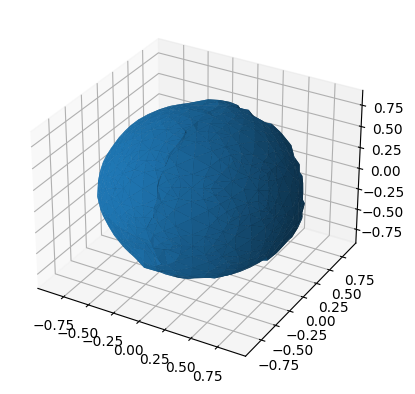

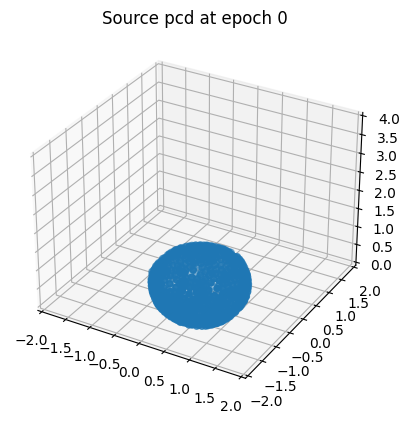

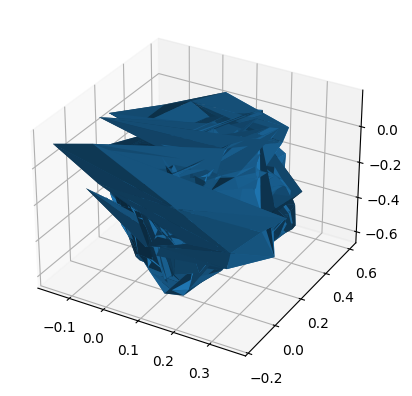

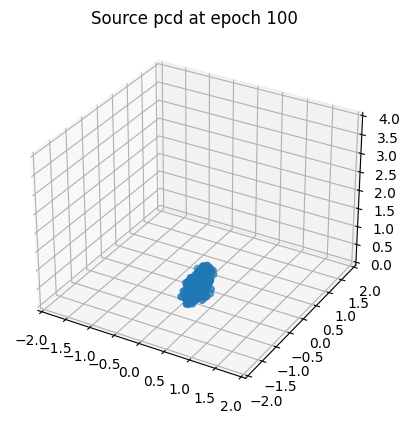

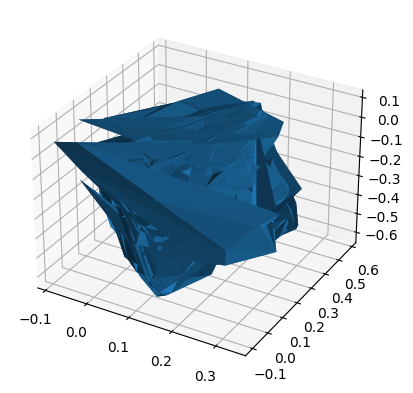

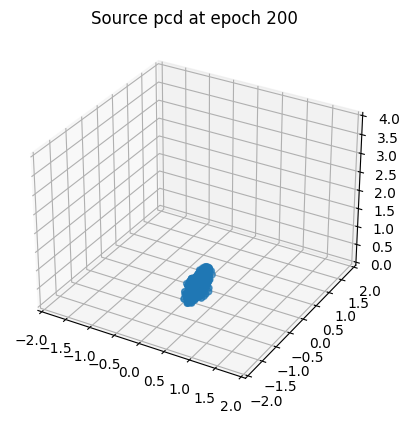

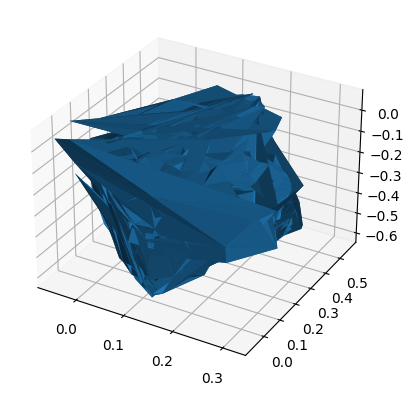

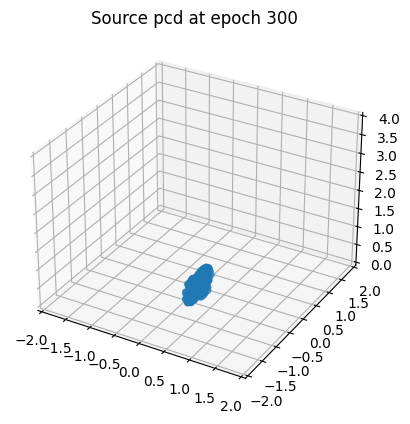

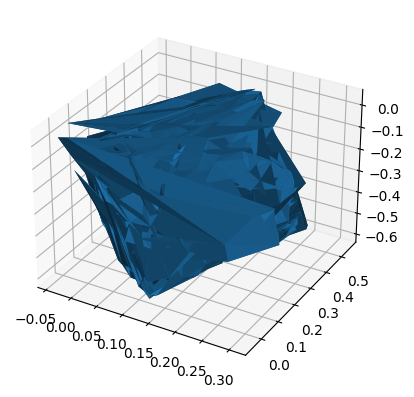

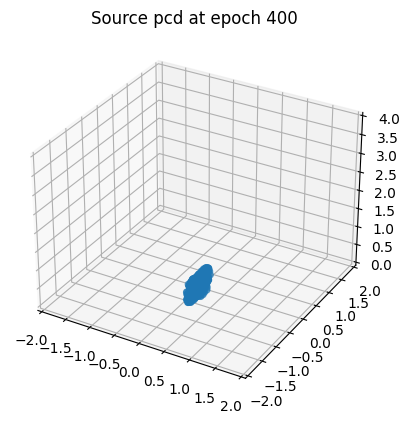

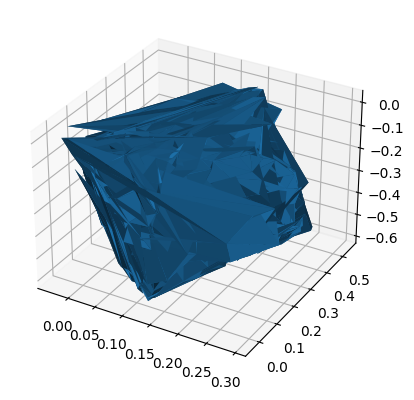

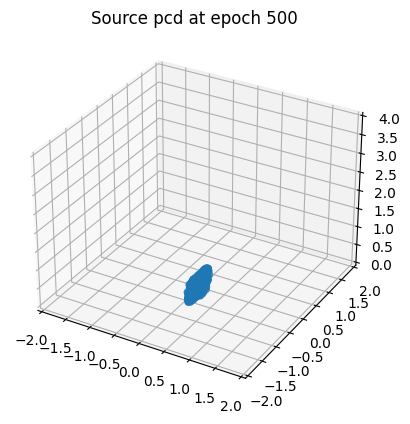

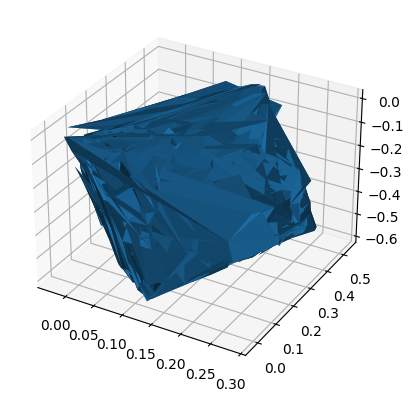

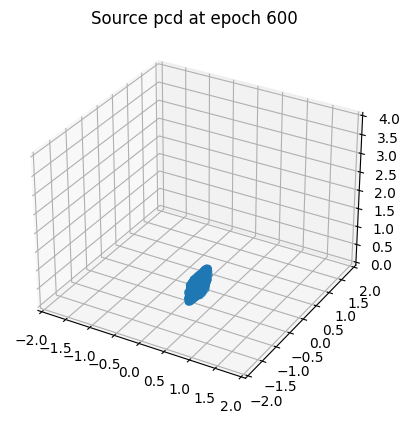

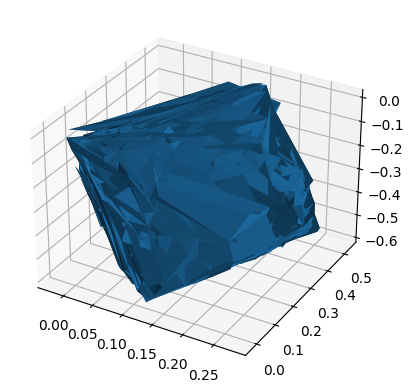

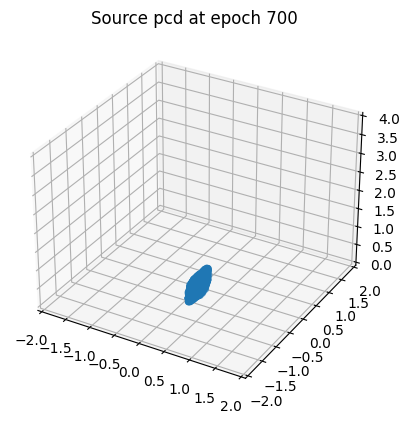

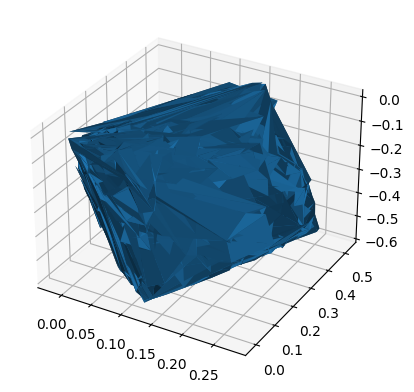

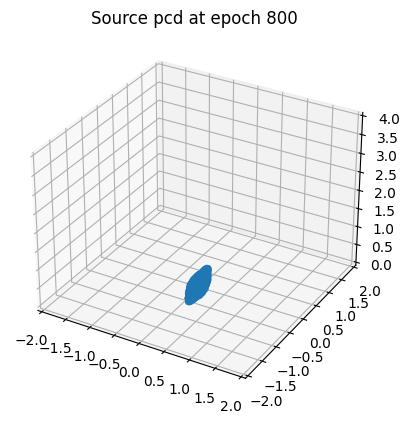

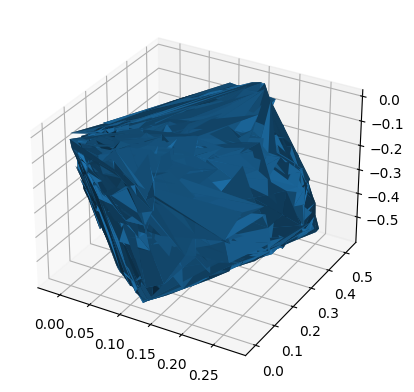

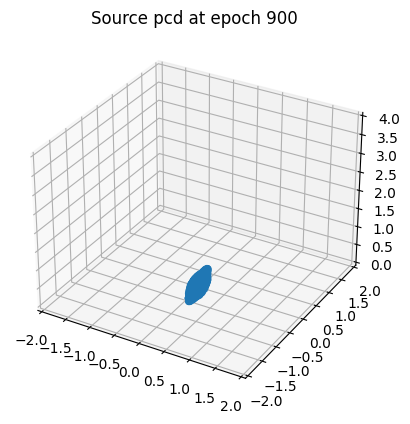

In [51]:
"""Build optimizer for registration of point clouds (Using Chamfer-only Loss)"""
import torch
import matplotlib.pyplot as plt

LR = 0.04
EPOCH = 1000
meshSrcCp = meshSrcCp

def mesh_vis(trim):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_trisurf(trim.vertices[:, 0], trim.vertices[:,1], trim.vertices[:,2], triangles=trim.faces);    
    return 0

# plot data
# plt.scatter(x,y)
# plt.show()

# Dataset loading
vertSrcTen = torch.tensor(vertSrc)
vertTgTen = torch.tensor(vertTg)
vertSrcTen.requires_grad_()

# Optimizer and Loss function definitions
optimizer_Adam = torch.optim.Adam([vertSrcTen], lr = LR, betas = (0.9,0.99))
loss_func = Chamfer_distance_torch # Using Chamfer-only loss
losses = []

vertSrcTen = vertSrcTen.unsqueeze(0)
vertTgTen = vertTgTen.unsqueeze(0)
print(vertSrcTen.shape)
print(vertTgTen.shape)
for epoch in range(EPOCH):
    optimizer_Adam.zero_grad()
    loss = loss_func(vertSrcTen, vertTgTen)
    loss.backward()
    optimizer_Adam.step()
    if ((epoch) % 10 == 0):
        print("Epoch {}. Chamfer Loss: {}".format(epoch, loss.item()))
    if ((epoch) % 100 == 0):
        meshSrcCp.vertices = vertSrcTen.squeeze(0).detach()
        mesh_vis(meshSrcCp)
        show_points(vertSrcTen.squeeze(0).detach(), "Source pcd at epoch {}".format(epoch))
    losses.append(loss.item())

# show_points(vertTgTen.squeeze(0), "Target pcd")

In [38]:
import open3d

vis = open3d.visualization.Visualizer()
vis.create_window(visible = False)

def draw_geometries(geoms):
    for g in geoms:
        vis.add_geometry(g)
    view_ctl = vis.get_view_control()
    view_ctl.set_up((0, 1e-4, 1))
    view_ctl.set_front((0, 0.5, 2))
    view_ctl.set_lookat((0, 0, 0))
    # do not change this view point
    vis.update_renderer()
    img = vis.capture_screen_float_buffer(True)
    plt.figure(figsize=(8,6))
    plt.imshow(np.asarray(img)[::-1, ::-1])
    for g in geoms:
        vis.remove_geometry(g)


pcd = open3d.geometry.PointCloud()
pcd1 = open3d.geometry.PointCloud()
src = vertSrcTen.squeeze(0).detach().numpy()
tg = vertTgTen.squeeze(0).detach().numpy()
print(src.shape)
pcd.points = open3d.utility.Vector3dVector(src)
pcd.paint_uniform_color([1, 0.706, 0])
# print(np.asarray(pcd.colors))
pcd1.points = open3d.utility.Vector3dVector(tg)
pcd1.paint_uniform_color([0, 0.706, 1])

# draw_geometries([pcd, pcd1])

(962, 3)


PointCloud with 1502 points.

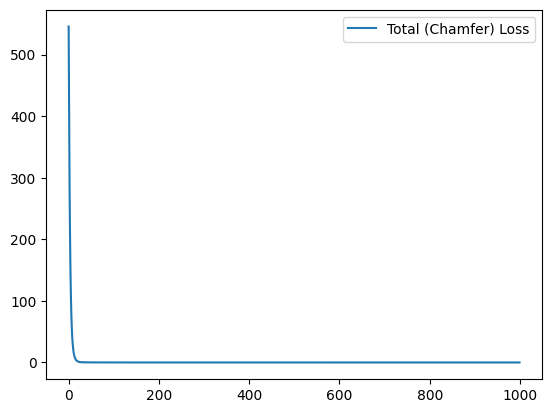

In [6]:
# plot Loss lines 
x = list(range(len(losses))) 
plt.plot(x, losses, label = "Total (Chamfer) Loss") 
plt.legend() 
plt.show()

(b) Curvature and normal-based loss

In [47]:
"""Loss computation functions"""
import trimesh
import numpy as np
import networkx as nx


def Compute_Delta_pi(pcd, edges):
    """
    Compute delta pi for every point of a given mesh (differentiable inputs to differentiable mediums)
    pcd: point cloud input
    edges: points' connections
    return -> 1*n*3 delta pi matrix
    """
    g = nx.from_edgelist(edges)
    # print([list(g[i].keys()) for i in range(len(g))])
    one_ring = [list(g[i].keys()) for i in range(len(g))]
    
    delta_p = torch.zeros((len(one_ring), 3))
    ind = 0
    for i, x in zip(one_ring, pcd[0]):
        delta_p[ind] = x - torch.mean(pcd[0][i], axis=0)
        ind += 1    
    return delta_p.unsqueeze(0)


def Normal_curvature_loss_torch(srcDelpi, tgDelpi, idx1, idx2):
    """
    Compute delta pi loss for src and tg point clouds.
    idx1: 1 x points in point cloud 1, for each point of pc1, index of the nearest neighbor in pc2.
    idx2: 1 x points in point cloud 2, for each point of pc2, index of the nearest neighbor in pc1.
    srcDelpi, tgDelpi: delta pis for source and target point clouds.
    """
    return torch.sum((srcDelpi[0] - tgDelpi[0][idx1, :])**2) + torch.sum((tgDelpi[0] - srcDelpi[0][idx2, :])**2)
        
# helper functions for computing Chamfer distance
def bpdist2(feature1, feature2, data_format='NWC'):
    """This version has a high memory usage but more compatible(accurate) with optimized Chamfer Distance."""
    if data_format == 'NCW':
        diff = feature1.unsqueeze(3) - feature2.unsqueeze(2)
        distance = torch.sum(diff ** 2, dim=1)
    elif data_format == 'NWC':
        diff = feature1.unsqueeze(2) - feature2.unsqueeze(1)
        distance = torch.sum(diff ** 2, dim=3)
    else:
        raise ValueError('Unsupported data format: {}'.format(data_format))
    return distance

# params:
#   xyz1: 1 x points x 3, point cloud 1 (pc1)
#   xyz2: 1 x points x 3, point cloud 2 (pc2)
# output:
#   dist1: 1 x points in point cloud 1, the nearest neighbor distance for each point of pc1 to pc2
#   idx1: 1 x points in point cloud 1, for each point of pc1, index of the nearest neighbor in pc2
#   dist2: 1 x points in point cloud 2, the nearest neighbor distance for each point of pc2 to pc1
#   idx2: 1 x points in point cloud 2, for each point of pc2, index of the nearest neighbor in pc1
def Chamfer_distance_torch_with_correspondances(xyz1, xyz2, data_format='NWC'):
    """
    Compute the Chamfer distance loss, together with correspondance information
    """
    # print(torch.is_tensor(xyz1), (xyz1.dim()))
    assert torch.is_tensor(xyz1) and xyz1.dim() == 3
    assert torch.is_tensor(xyz2) and xyz2.dim() == 3
    if data_format == 'NCW':
        assert xyz1.size(1) == 3 and xyz2.size(1) == 3
    elif data_format == 'NWC':
        assert xyz1.size(2) == 3 and xyz2.size(2) == 3
    distance = bpdist2(xyz1, xyz2, data_format)
    dist1, idx1 = distance.min(2)
    dist2, idx2 = distance.min(1)
    chamfer = torch.sum(dist1**2)+torch.sum(dist2**2) # compute the chamfer distance
    return chamfer, dist1, idx1, dist2, idx2

def Total_loss(srcPcd, tgPcd, srcDelpi, tgDelpi, epi=0.575):
    """
    Compute total pcd deformation loss (containing Chamfer loss and the curvature and normal loss)
    epi: The relative importance of normal curvature loss
    """
    ChamferLoss, dist1, idx1, dist2, idx2 = Chamfer_distance_torch_with_correspondances(srcPcd, tgPcd)
    NormalCurvatureLoss = Normal_curvature_loss_torch(srcDelpi, tgDelpi, idx1, idx2)
    return ChamferLoss, NormalCurvatureLoss



torch.Size([1, 962, 3])
torch.Size([1, 1502, 3])
Epoch 0. CF Loss: 545.5872855331091. Curvature Loss: 1.399462103843689. Total Loss: 232.67928707022222
Epoch 10. CF Loss: 49.048734242357476. Curvature Loss: 3.36802339553833. Total Loss: 22.78232549351554
Epoch 20. CF Loss: 6.543107606908906. Curvature Loss: 3.6454038619995117. Total Loss: 4.876927977427862
Epoch 30. CF Loss: 1.429741103624375. Curvature Loss: 1.9452439546585083. Total Loss: 1.726155222107376
Epoch 40. CF Loss: 0.4975591090922874. Curvature Loss: 1.3604191541671753. Total Loss: 0.9937036081882578
Epoch 50. CF Loss: 0.2542409965808805. Curvature Loss: 1.357884407043457. Total Loss: 0.8888359575968621
Epoch 60. CF Loss: 0.1730343035286851. Curvature Loss: 0.8381080031394958. Total Loss: 0.5554516852752497
Epoch 70. CF Loss: 0.13460054860866438. Curvature Loss: 0.6208484172821045. Total Loss: 0.414193067135428
Epoch 80. CF Loss: 0.1068650141706439. Curvature Loss: 0.4025413393974304. Total Loss: 0.2768789026661623
Epoch 90

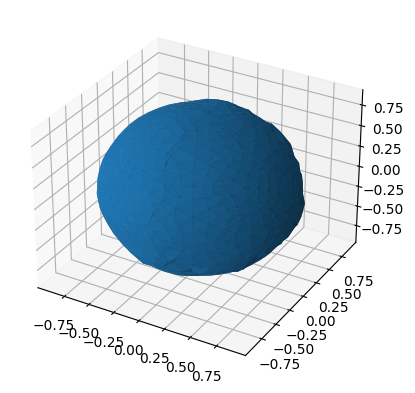

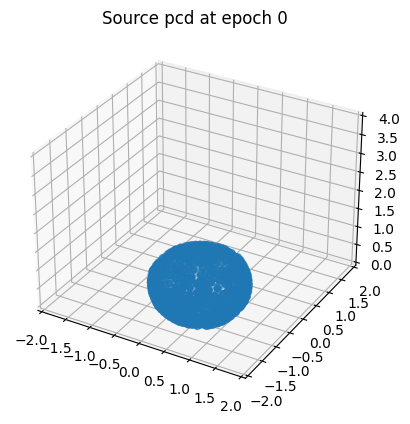

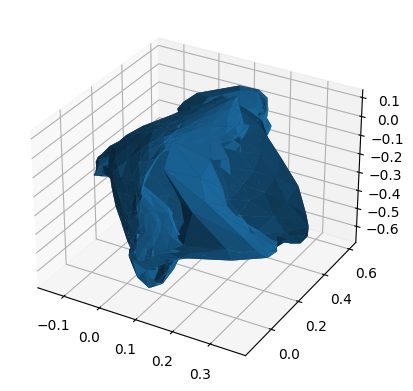

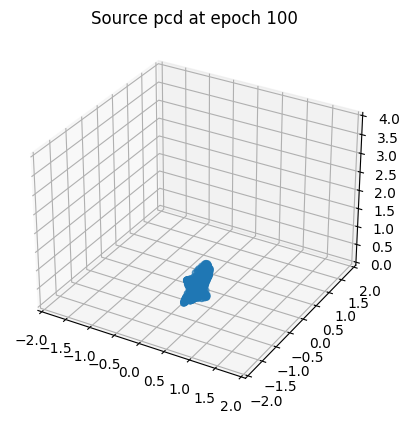

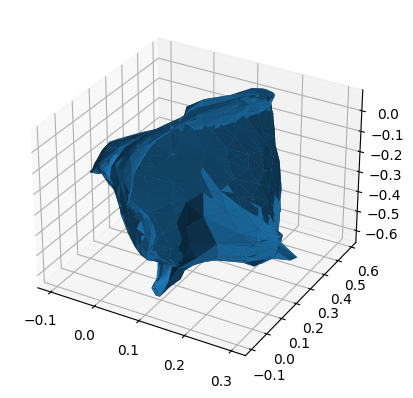

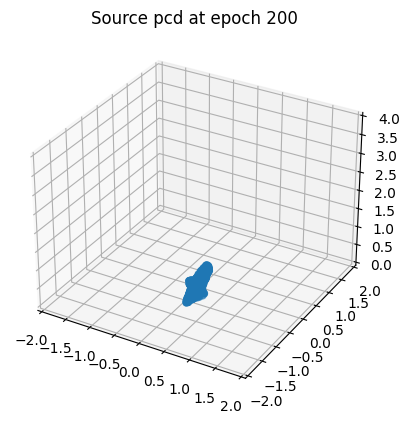

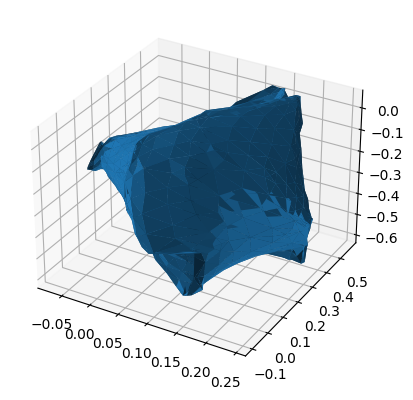

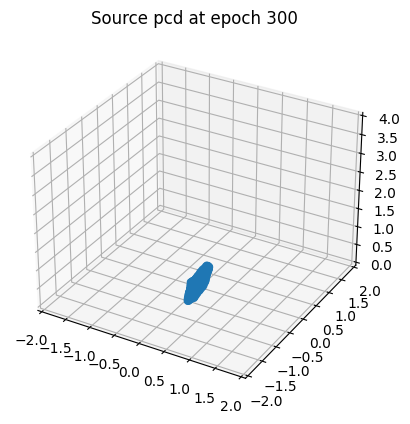

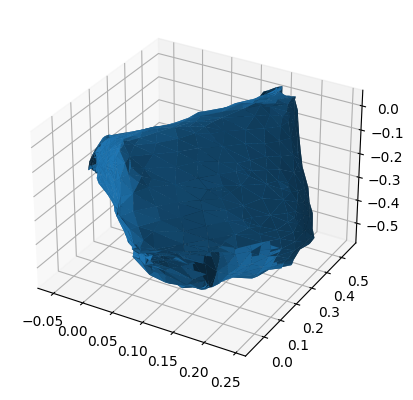

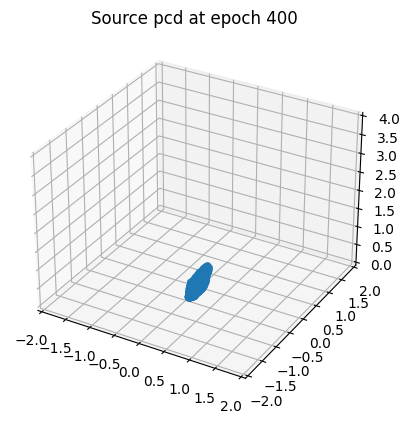

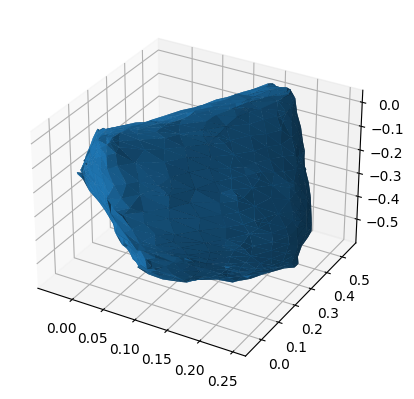

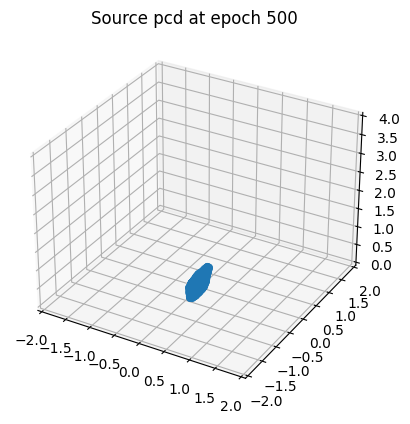

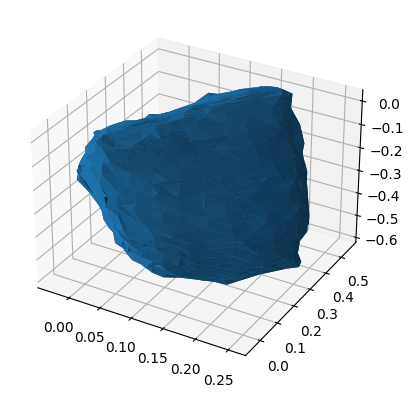

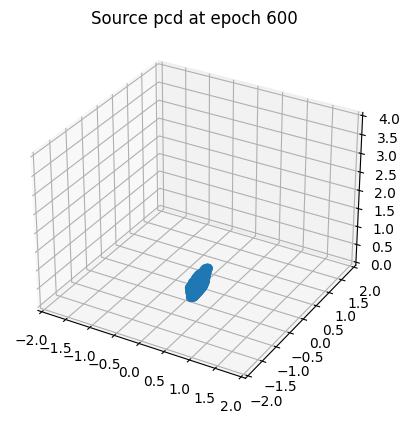

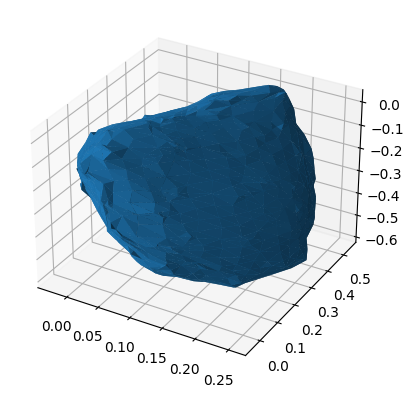

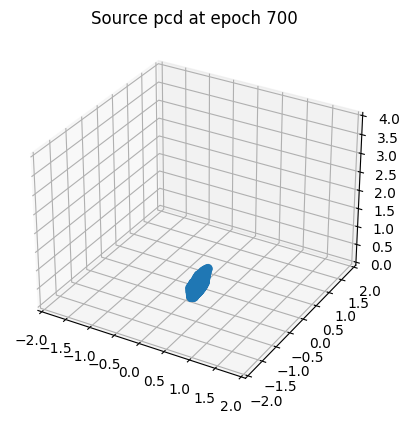

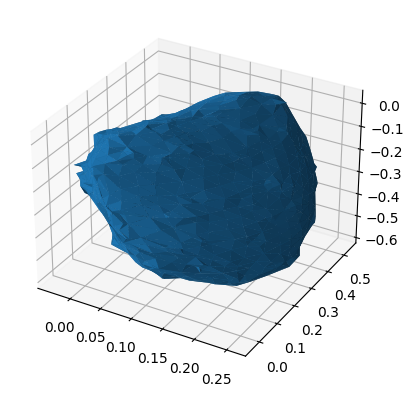

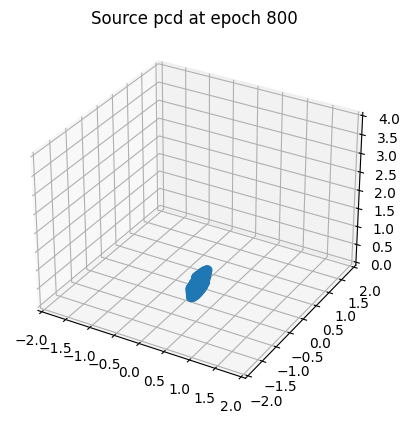

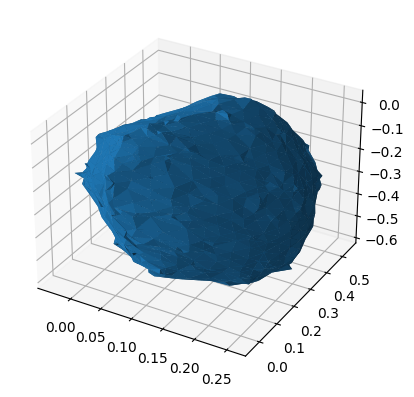

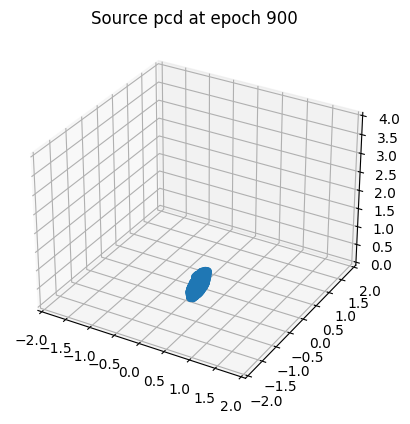

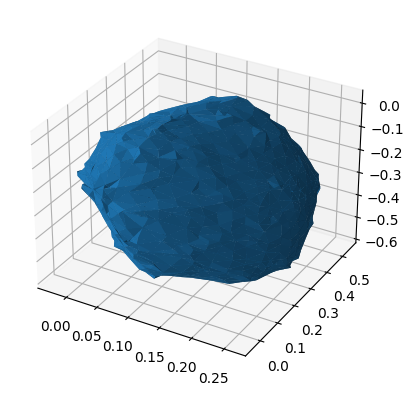

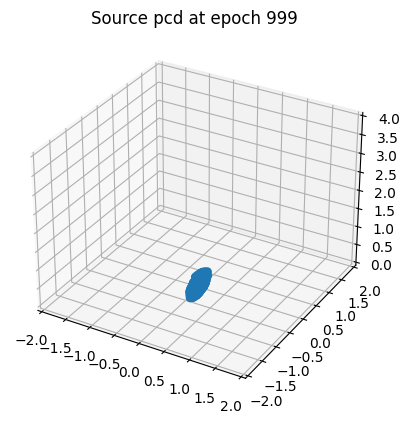

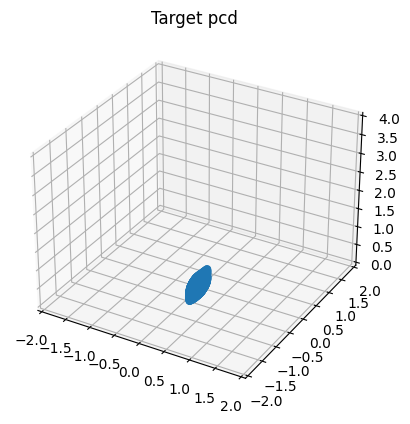

In [52]:
"""Build optimizer for registration of point clouds (using Chamfer+Curvature Loss)"""
import torch
import matplotlib.pyplot as plt 
  
LR = 0.03
EPOCH = 1000

meshSrcCp = copy.copy(meshSrc)

def mesh_vis(trim):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_trisurf(trim.vertices[:, 0], trim.vertices[:,1], trim.vertices[:,2], triangles=trim.faces);    
    return 0


# Dataset loading
vertSrcTen = torch.tensor(vertSrc)
vertSrcTen = vertSrcTen.unsqueeze(0)
vertTgTen = torch.tensor(vertTg)
vertTgTen = vertTgTen.unsqueeze(0)
vertSrcTen.requires_grad_()
srcDelpiTen = Compute_Delta_pi(vertSrcTen, meshSrc.edges)
tgDelpiTen = Compute_Delta_pi(vertTgTen, meshTg.edges)
assert len(tgDelpiTen.shape) == len(srcDelpiTen.shape) == 3

# Optimizer and Loss function definitions
optimizer_Adam = torch.optim.Adam([vertSrcTen], lr = LR, betas = (0.9,0.99))
loss_func = Total_loss
epi = 0.575 # importance of Normal and Curvature loss compared to Chamfer loss
losses = [] # Total loss
cf_losses = [] # Chamfer distance loss
curv_losses = [] # Normal and Curvature loss

print(vertSrcTen.shape)
print(vertTgTen.shape)
for epoch in range(EPOCH):
    # TODO: Write a function to compute src and tg Delta pi on every epoch
    optimizer_Adam.zero_grad()
    srcDelpiTen = Compute_Delta_pi(vertSrcTen, meshSrc.edges)
    cf_loss, curv_loss = loss_func(vertSrcTen, vertTgTen, srcDelpiTen, tgDelpiTen)
    loss = (1-epi) * cf_loss + epi * curv_loss
    loss.backward()
    optimizer_Adam.step()
    if ((epoch) % 10 == 0):
        print("Epoch {}. CF Loss: {}. Curvature Loss: {}. Total Loss: {}".format(epoch, cf_loss.item(), curv_loss.item(), loss.item()))
    if (((epoch) % 100 == 0) or (epoch==EPOCH-1)):
        meshSrcCp.vertices = vertSrcTen.squeeze(0).detach()
        mesh_vis(meshSrcCp)
        show_points(vertSrcTen.squeeze(0).detach(), "Source pcd at epoch {}".format(epoch))

    cf_losses.append(cf_loss.item())
    curv_losses.append(curv_loss.item())
    losses.append(loss.item())



# show result
show_points(vertTgTen.squeeze(0), "Target pcd")

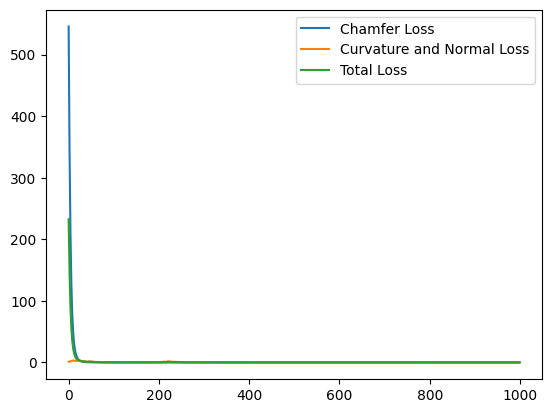

In [9]:
# plot Loss lines 
x = list(range(len(curv_losses))) 
plt.plot(x, cf_losses, label = "Chamfer Loss") 
plt.plot(x, curv_losses, label = "Curvature and Normal Loss") 
plt.plot(x, losses, label = "Total Loss") 
plt.legend() 
plt.show()

(962, 3)


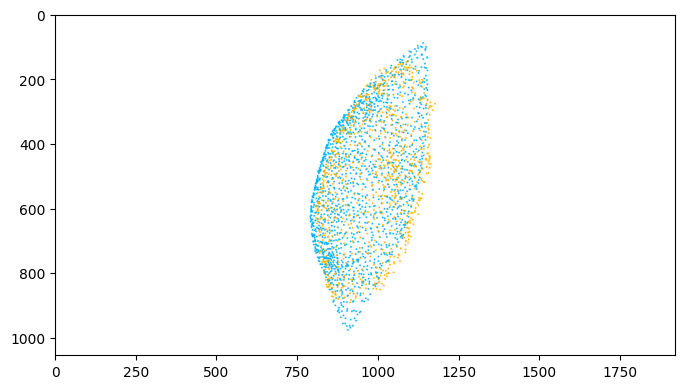

In [21]:
import open3d

vis = open3d.visualization.Visualizer()
vis.create_window(visible = False)

def draw_geometries(geoms):
    for g in geoms:
        vis.add_geometry(g)
    view_ctl = vis.get_view_control()
    view_ctl.set_up((0, 1e-4, 1))
    view_ctl.set_front((0, 0.5, 2))
    view_ctl.set_lookat((0, 0, 0))
    # do not change this view point
    vis.update_renderer()
    img = vis.capture_screen_float_buffer(True)
    plt.figure(figsize=(8,6))
    plt.imshow(np.asarray(img)[::-1, ::-1])
    for g in geoms:
        vis.remove_geometry(g)


pcd = open3d.geometry.PointCloud()
pcd1 = open3d.geometry.PointCloud()
src = vertSrcTen.squeeze(0).detach().numpy()
tg = vertTgTen.squeeze(0).detach().numpy()
print(src.shape)
pcd.points = open3d.utility.Vector3dVector(src)
pcd.paint_uniform_color([1, 0.706, 0])
# print(np.asarray(pcd.colors))
pcd1.points = open3d.utility.Vector3dVector(tg)
pcd1.paint_uniform_color([0, 0.706, 1])

draw_geometries([pcd, pcd1])

## Problem 2: ICP

In [10]:
"""Visualization utilies."""

# You can use other visualization from previous homeworks, like Open3D
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def show_points(points, title):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_title(title)
    ax.set_xlim3d([-2, 2])
    ax.set_ylim3d([-2, 2])
    ax.set_zlim3d([0, 4])
    ax.scatter(points[:, 0], points[:, 2], points[:, 1])
    
def compare_points(points1, points2):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_xlim3d([-2, 2])
    ax.set_ylim3d([-2, 2])
    ax.set_zlim3d([0, 4])
    ax.scatter(points1[:, 0], points1[:, 2], points1[:, 1])
    ax.scatter(points2[:, 0], points2[:, 2], points2[:, 1])

In [11]:
"""Load data."""

import trimesh
import numpy as np

source_pcd = trimesh.load("banana.source.ply").vertices
target_pcd = trimesh.load("banana.target.ply").vertices
gt_T = np.loadtxt("banana.pose.txt")


In [12]:
"""Implement your own ICP."""
from tqdm import tqdm
import numpy as np
from sklearn.neighbors import NearestNeighbors

def oneNN(source_pcd, target_pcd):
    '''
    Map source_pcd to nearest neighbour in target_pcd
    Outputs:
        dists: Euclidean distances of the nearest neighbor
        inds: target_pcd indices of the nearest neighbor
    '''
    neigh = NearestNeighbors(n_neighbors=1)
    neigh.fit(target_pcd)
    dists, inds = neigh.kneighbors(source_pcd, return_distance=True)
    return dists.ravel(), inds.ravel()



def getRT(source_pcd, target_pcd):
    """
    Get R, t, given source pcd and aligned target pcd
    """
    # Get R, t (by Umeyama's minimization of distance)
    N = source_pcd.shape[0]
    qbar = np.mean(target_pcd, axis=0)
    pbar = np.mean(source_pcd, axis=0)
    M = (target_pcd-qbar).T @ (source_pcd-pbar)
    U, D, VT = np.linalg.svd(M) 
    
    R = U @ VT
    if (np.linalg.det(R)<0):
        VT[-1,:] *= -1
        R = U @ VT  
    
    t = qbar - (R @ pbar)
    return R, t

def icp(source_pcd, target_pcd):
    """Iterative closest point.
    
    Args:
        source_pcd (np.ndarray): [N1, 3]
        target_pcd (np.ndarray): [N2, 3]
    
    Returns:
        np.ndarray: [4, 4] rigid transformation to align source to target.
    """
    T = np.eye(4)
    R, t = np.eye(3), np.zeros(3)
    N = source_pcd.shape[0]
    source_pcd_cp = source_pcd.copy()

    # Implement your own algorithm here.
    nsteps = 300
    for i in tqdm(range(nsteps)):
        # Update correspondance (by re-aligning target)
        distances, indices = oneNN(source_pcd, target_pcd)
        # Umayama's algo for getting R, t
        R, t = getRT(source_pcd, target_pcd[indices, :])
        source_pcd = source_pcd @ R.T + t

    R, t = getRT(source_pcd_cp, source_pcd)
    T[:3, :3], T[:3, -1] = R, t
    # print("Final T:")
    # print(T)
    return T
















100%|██████████| 300/300 [00:16<00:00, 18.02it/s]


GT T:
[[ 0.04139069 -0.12505186  0.99128646  1.14856815]
 [-0.15543338  0.9792519   0.13002374  1.55152014]
 [-0.98697886 -0.15946078  0.02109468  0.44714717]
 [ 0.          0.          0.          1.        ]]
pred T:
[[-0.03226957 -0.50271669 -0.86384872  1.09361539]
 [ 0.13146246  0.854655   -0.50227726  1.53642465]
 [ 0.99079579 -0.12977195  0.03850902  0.48842529]
 [ 0.          0.          0.          1.        ]]
rre=179.9503708905986, rte=0.07036734069765385


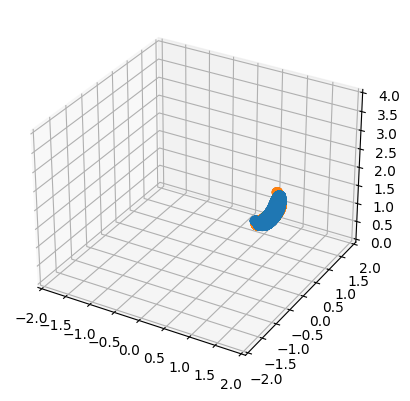

In [13]:
"""Metric and visualization."""

def compute_rre(R_est: np.ndarray, R_gt: np.ndarray):
    """Compute the relative rotation error (geodesic distance of rotation)."""
    assert R_est.shape == (3, 3), 'R_est: expected shape (3, 3), received shape {}.'.format(R_est.shape)
    assert R_gt.shape == (3, 3), 'R_gt: expected shape (3, 3), received shape {}.'.format(R_gt.shape)
    # relative rotation error (RRE)
    # Rotational degree loss (not objective of optimization)
    rre = np.arccos(np.clip(0.5 * (np.trace(R_est.T @ R_gt) - 1), -1.0, 1.0))
    return rre


def compute_rte(t_est: np.ndarray, t_gt: np.ndarray):
    assert t_est.shape == (3,), 't_est: expected shape (3,), received shape {}.'.format(t_est.shape)
    assert t_gt.shape == (3,), 't_gt: expected shape (3,), received shape {}.'.format(t_gt.shape)
    # relative translation error (RTE)
    rte = np.linalg.norm(t_est - t_gt) # Resembling MSE loss
    return rte


# Visualization
T = icp(source_pcd, target_pcd)
# T = np.eye(4)
print("GT T:")
print(gt_T)
print("pred T:")
print(T)
rre = np.rad2deg(compute_rre(T[:3, :3], gt_T[:3, :3]))
rte = compute_rte(T[:3, 3], gt_T[:3, 3])
print(f"rre={rre}, rte={rte}")
compare_points(source_pcd @ T[:3, :3].T + T[:3, 3], target_pcd)